# Heart Disease Classification (Logistic Regression)

In [80]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('whitegrid')

In [81]:
heart = pd.read_csv('data/heart_disease.csv')

In [82]:
heart.columns.tolist()

['Unnamed: 0',
 'age',
 'sex',
 'cp',
 'trestbps',
 'chol',
 'fbs',
 'restecg',
 'thalach',
 'exang',
 'oldpeak',
 'slope',
 'ca',
 'thal',
 'present']

In [83]:
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  303 non-null    int64  
 1   age         303 non-null    int64  
 2   sex         303 non-null    int64  
 3   cp          303 non-null    int64  
 4   trestbps    303 non-null    int64  
 5   chol        303 non-null    int64  
 6   fbs         303 non-null    int64  
 7   restecg     303 non-null    int64  
 8   thalach     303 non-null    int64  
 9   exang       303 non-null    int64  
 10  oldpeak     303 non-null    float64
 11  slope       303 non-null    int64  
 12  ca          303 non-null    object 
 13  thal        303 non-null    object 
 14  present     303 non-null    int64  
dtypes: float64(1), int64(12), object(2)
memory usage: 35.6+ KB


In [84]:
heart.describe(include='all')

,Unnamed: 0,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,present
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303,303,303.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,4,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,3.0,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,176,166,NaN
mean,152.000000,54.438944,0.679868,3.158416,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,NaN,NaN,0.458746
std,87.612784,9.038662,0.467299,0.960126,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,NaN,NaN,0.499120
min,1.000000,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,NaN,NaN,0.000000
25%,76.500000,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,NaN,NaN,0.000000
50%,152.000000,56.000000,1.000000,3.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,NaN,NaN,0.000000
75%,227.500000,61.000000,1.000000,4.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,NaN,NaN,1.000000


In [85]:
heart.head()

,Unnamed: 0,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,present
0,1,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
1,2,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,1
2,3,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
3,4,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
4,5,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0


In [86]:
heart['ca'] = pd.to_numeric(heart['ca'], errors='coerce')
heart['thal'] = pd.to_numeric(heart['thal'], errors='coerce')

In [87]:
heart.drop(columns=['Unnamed: 0'], inplace=True)

In [88]:
present_df = heart[heart['present'] == 1]
non_present_df = heart[heart['present'] == 0]

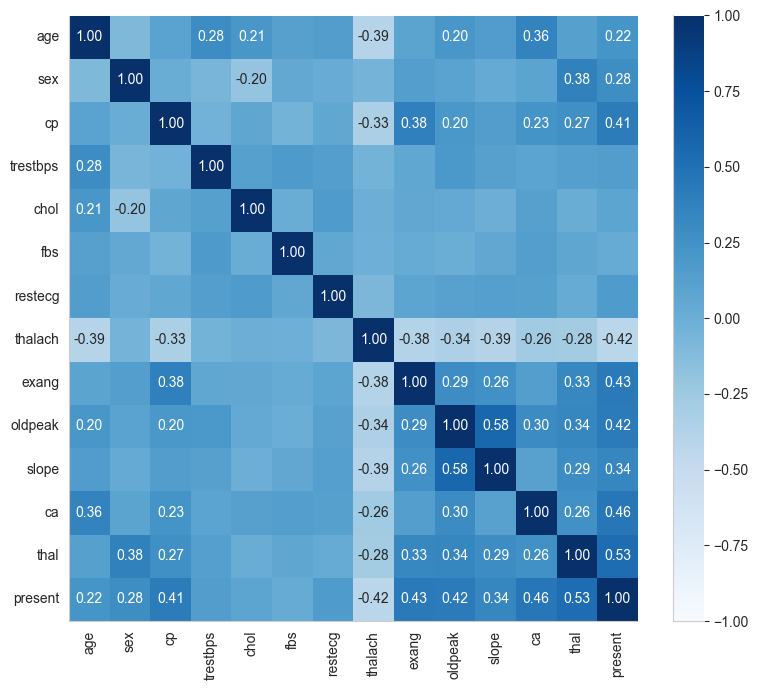

In [89]:
fig = plt.figure(figsize=(8, 7))
ax = sns.heatmap(heart.corr(numeric_only=True), cmap='Blues', vmin=-1, vmax=1, annot=True)

for text in ax.texts:
    t = float(text.get_text())
    if (t < .2) & (t > -.2):
        text.set_text('')
    else:
        text.set_text(f'{t:.2f}')
        
plt.tight_layout()
sns.despine()
plt.show()

In [90]:
abs(heart.corr(numeric_only=True)['present']).sort_values(ascending=False)[1:]

thal        0.525689
ca          0.460442
exang       0.431894
oldpeak     0.424510
thalach     0.417167
cp          0.414446
slope       0.339213
sex         0.276816
age         0.223120
restecg     0.169202
trestbps    0.150825
chol        0.085164
fbs         0.025264
Name: present, dtype: float64

In [91]:
cols_to_check = abs(heart.corr(numeric_only=True)['present']).sort_values(ascending=False)[1:-2].index.tolist()

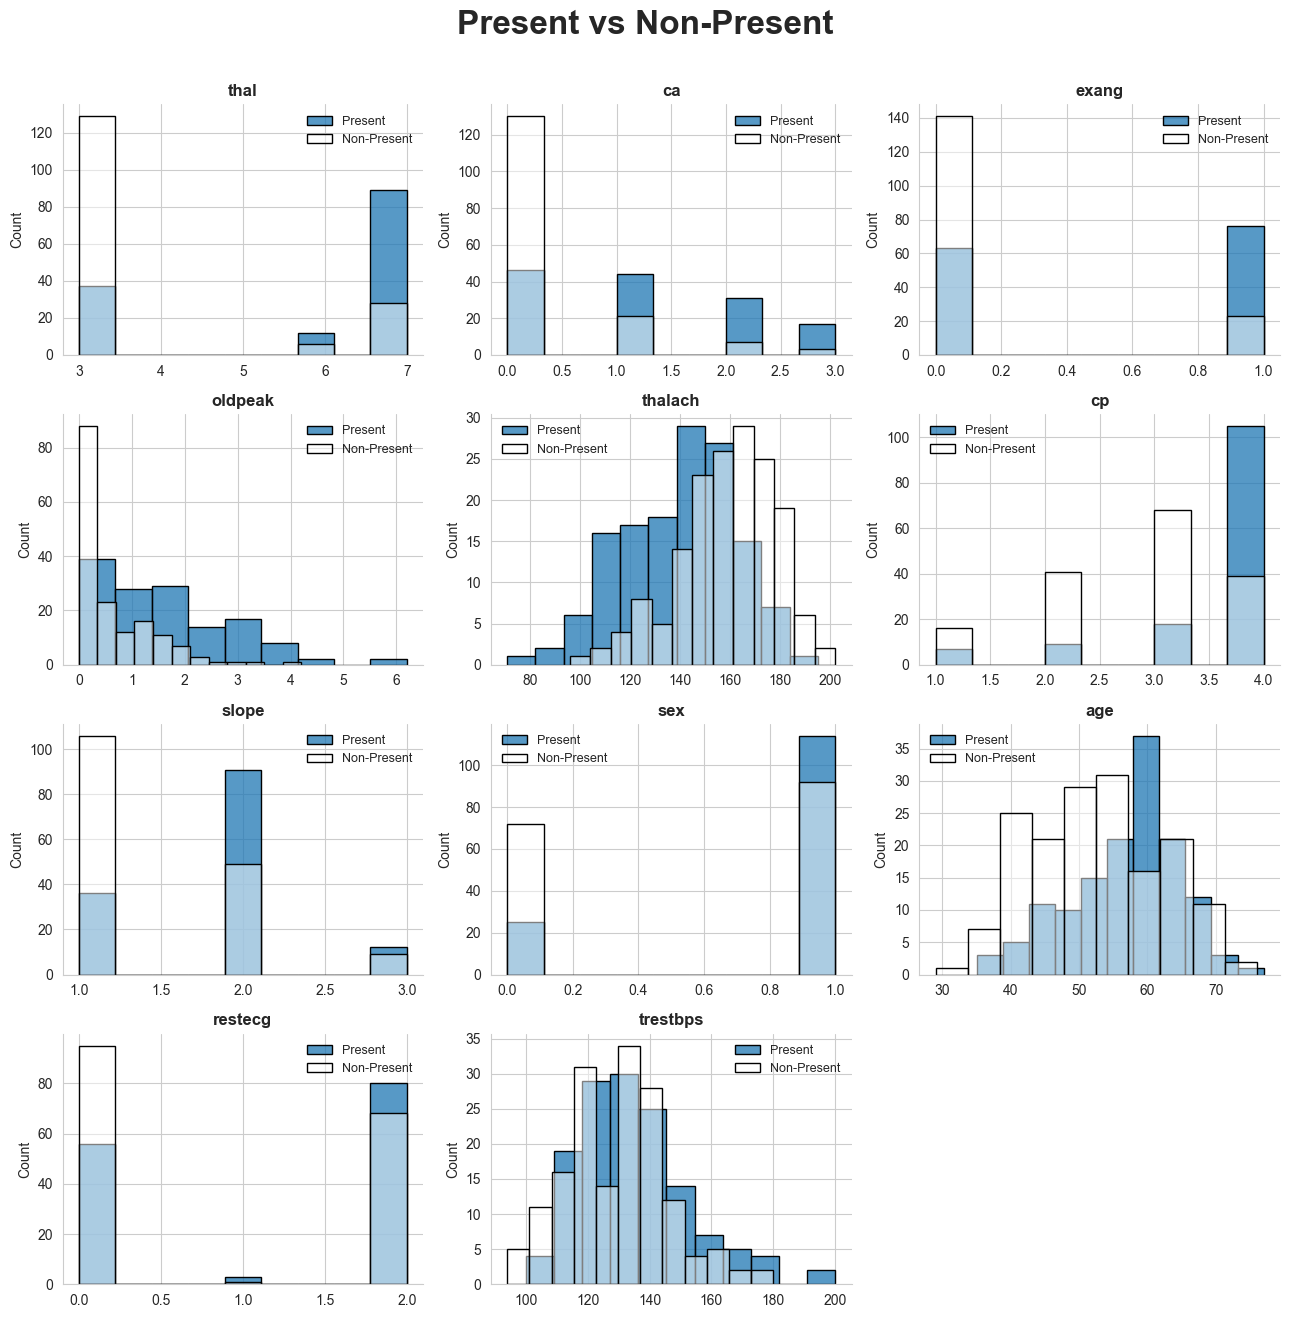

In [115]:
fig = plt.figure(figsize=(13, 13))
fig.suptitle('Present vs Non-Present', fontsize=24, fontweight='bold', y=1.01)

for i, col in enumerate(cols_to_check):
    if i <= len(cols_to_check):
        ax = fig.add_subplot(4, 3, i+1)
        sns.histplot(data=present_df, x=col, ax=ax, edgecolor='black',label='Present')
        sns.histplot(data=non_present_df, x=col, ax=ax, alpha=0.5, color='white', edgecolor='black', label='Non-Present')
        plt.legend(loc='best', fontsize=9, frameon=False)
        ax.set_title(col)
        ax.set_xlabel('')
        ax.set_title(col, fontsize=12, fontweight='bold')
    else:
        break
    
plt.tight_layout()
sns.despine()
plt.show()

In [ ]:
features = ['thal', 'ca', 'cp']

We will use `thal`, `ca`, and `cp` after viewing the results of the heatmap, correlation table, and histogram distributions per present vs non-present. We can see clearer distinctions in the plots, suggesting easier classification for the model compared to other potential features.

We also can try `age` if we want further on, as domain knowledge tells us that the elderly are inherently more likely to have heart disease.